In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle
from wordcloud import WordCloud, STOPWORDS

plt.style.use('fivethirtyeight')

In [2]:
# dont run these 
# AccessToken = '1325166553-AaLqrAHSEzFQg0KOQPrfL5B46EiOuvw3bWV7FUb'
# AccessTokenSecret = 'ahA6V1c7wQoByveazFsq1dcf2YrqccUqbmlPuWCNUJ8Yo'
# API_key = 'BtsZY4DuRx6D6WuYRmyRKc5gr'
# API_key_secret = 'hcqxqk31EzMpKMcRvNdQKDzpGVmsShVlfpX3k1vDXR6zzbIwuJ'

# auth = tweepy.OAuthHandler(API_key,API_key_secret)
# auth.set_access_token(AccessToken, AccessTokenSecret)
# api = tweepy.API(auth)

# user = api.me()
# print(user.name)

#tweets = []

#for page in range(1,10):
    #tweets.extend(api.user_timeline(screen_name = "realDonaldTrump", count=200, page=page))
    
#print("Number of tweets extracted: {}.".format(len(tweets)))


## Proof of Concept Work for Trump Twitter Analysis for Small Dataset of 1785 tweets

In [5]:
with open('trump_tweets.pkl', 'wb') as f:
    pickle.dump(tweets, f)

In [6]:
file = open('trump_tweets.pkl','rb')
tweets = pickle.load(file)
for tweet in tweets[:5]:
    print(tweet.text)
    

THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!
Undecided Voters at Concast Town Hall Previously Told Network They Were Voting Biden...https://t.co/NDaiFaxmmU
RT @LawEnforceToday: We've never before formally endorsed a candidate.  Today, that changes.  Law Enforcement Today proudly endorses Donald…
NOW THAT THE RADICAL LEFT DEMOCRATS GOT CAUGHT COLD IN THE (NON) FRIENDLY TRANSFER OF GOVERNMENT, IN FACT, THEY SPI… https://t.co/xIzvcHZYI6
She is far further left than Crazy Bernie. Biden would not last a month! https://t.co/kJWITxYRV1


In [7]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]



In [8]:
own_tweets[0].created_at

datetime.datetime(2020, 10, 7, 15, 25, 38)

In [9]:
own_tweets[0].text

'THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!'

In [10]:
own_tweets[0].favorite_count

108262

In [11]:
df = pd.DataFrame(data = [[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets],
                 columns= ['date','tweet', 'tweet_length', 'id', 'likes', 'retweets'])

In [12]:
df.head()

,date,tweet,tweet_length,id,likes,retweets
0,2020-10-07 15:25:38,THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!,49,1313863059019051009,108262,24790
1,2020-10-07 15:20:03,Undecided Voters at Concast Town Hall Previous...,110,1313861656766820352,23402,7872
2,2020-10-07 14:51:29,NOW THAT THE RADICAL LEFT DEMOCRATS GOT CAUGHT...,140,1313854465276080128,59299,18392
3,2020-10-07 14:33:40,She is far further left than Crazy Bernie. Bid...,96,1313849980906614785,36196,10290
4,2020-10-07 14:26:43,"Ari, THE MEDIA IS CORRUPT, JUST LIKE OUR DEMOC...",140,1313848232716521473,35715,11741


In [13]:
 df.tail()

,date,tweet,tweet_length,id,likes,retweets
941,2020-08-27 23:54:20,Democrats Hate that I called for Big Pharma to...,140,1299133174564491265,164854,35347
942,2020-08-27 23:18:41,Democrats and Biden didn’t even mention the An...,140,1299124203552210951,125146,30987
943,2020-08-27 23:07:39,The Ten Most Dangerous Cities in the U.S. are ...,101,1299121427879276544,286172,66380
944,2020-08-27 19:44:59,https://t.co/AWC0HLAgJD,23,1299070423838138369,51897,11972
945,2020-08-27 03:27:34,https://t.co/Bk68pgSU5D,23,1298824449966452737,56915,12295


In [14]:
df[df['likes']==df['likes'].max()]

,date,tweet,tweet_length,id,likes,retweets
99,2020-10-02 04:54:06,"Tonight, @FLOTUS and I tested positive for COV...",140,1311892190680014849,1885685,415997


In [15]:
df['likes'].describe()

count    9.460000e+02
mean     9.712559e+04
std      1.094656e+05
min      0.000000e+00
25%      4.154775e+04
50%      6.645550e+04
75%      1.174175e+05
max      1.885685e+06
Name: likes, dtype: float64

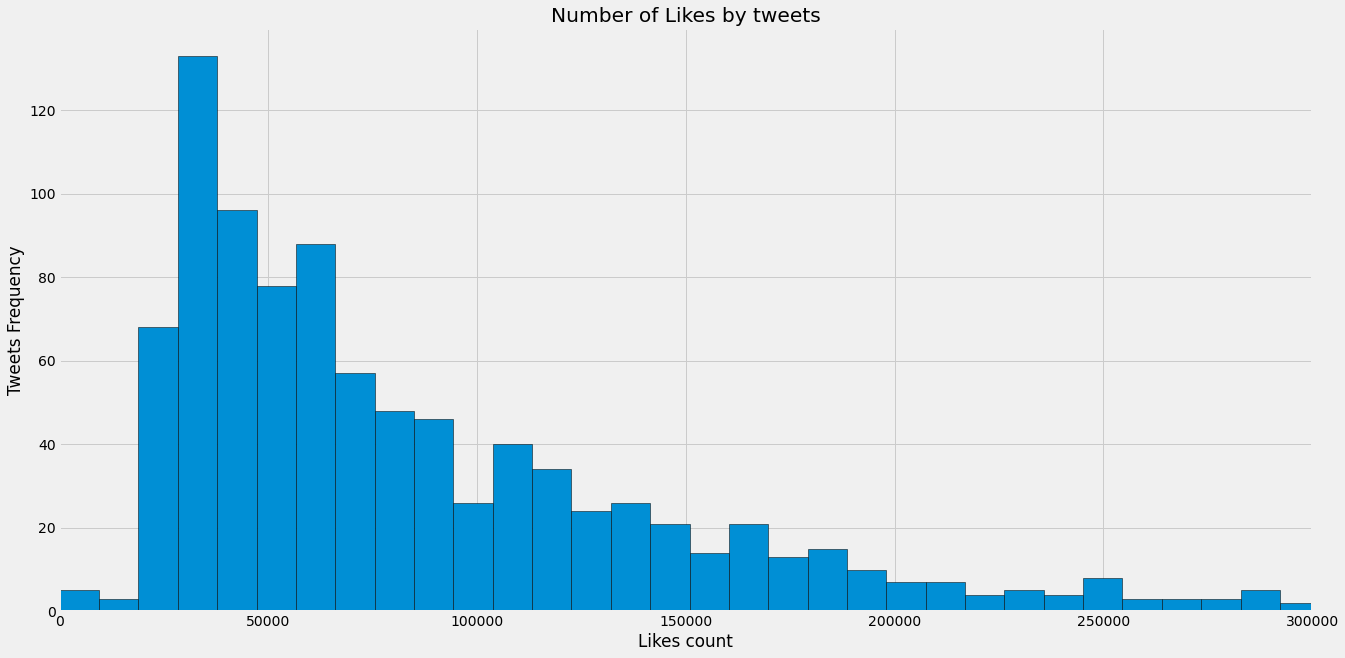

In [16]:
df['likes'].plot(kind = 'hist', bins= 200, figsize = (20,10), ec= 'black')
plt.xlim((-100, 300000))
plt.xlabel('Likes count')
plt.ylabel('Tweets Frequency')
plt.title('Number of Likes by tweets')
plt.show()

In [17]:
vader = SentimentIntensityAnalyzer()

#example
sentence = "Today is a beautiful day. I am very happy and excited to be here"
vader.polarity_scores(sentence)['compound']

0.8899

In [18]:
f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['sentiment'] = df['tweet'].apply(f)
df['date'] = pd.to_datetime(df['date']).dt.date

In [19]:
df.head()

,date,tweet,tweet_length,id,likes,retweets,sentiment
0,2020-10-07,THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!,49,1313863059019051009,108262,24790,-0.1759
1,2020-10-07,Undecided Voters at Concast Town Hall Previous...,110,1313861656766820352,23402,7872,-0.2263
2,2020-10-07,NOW THAT THE RADICAL LEFT DEMOCRATS GOT CAUGHT...,140,1313854465276080128,59299,18392,0.6037
3,2020-10-07,She is far further left than Crazy Bernie. Bid...,96,1313849980906614785,36196,10290,-0.4003
4,2020-10-07,"Ari, THE MEDIA IS CORRUPT, JUST LIKE OUR DEMOC...",140,1313848232716521473,35715,11741,0.5461


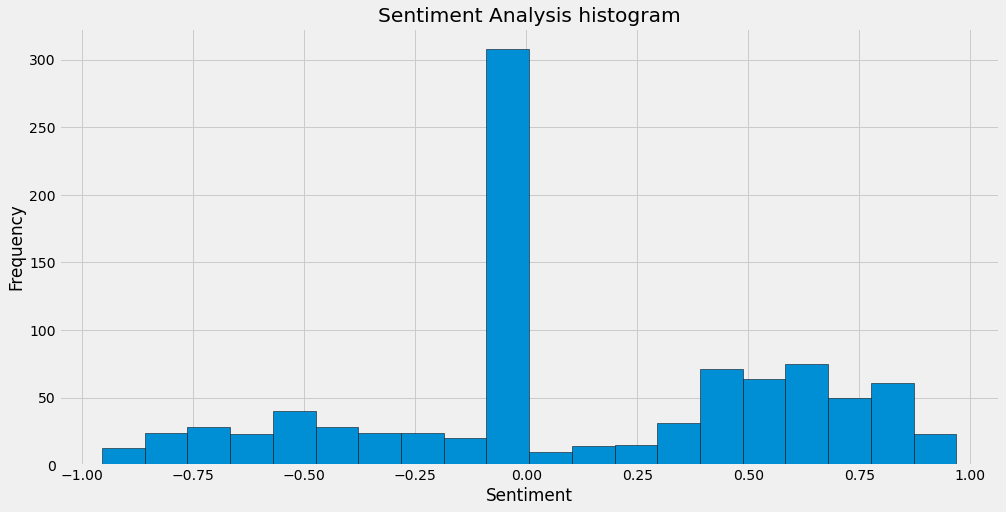

In [20]:
df['sentiment'].plot(kind = 'hist', bins = 20, ec = 'black', figsize=(15,7.5))
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis histogram')
plt.show()

In [21]:
date_df = df.groupby(['date']).mean().reset_index()

In [22]:
date_df.head()

,date,tweet_length,id,likes,retweets,sentiment
0,2020-08-27,85.400000,1.299055e+18,136996.800000,31396.200000,-0.357880
1,2020-08-28,32.689655,1.299247e+18,67395.206897,14834.965517,0.042934
2,2020-08-29,88.419355,1.299647e+18,74015.645161,16353.290323,0.161400
3,2020-08-30,95.870968,1.300041e+18,84988.709677,20079.225806,0.034781
4,2020-08-31,103.214286,1.300423e+18,122399.785714,26261.000000,-0.137521


Text(0.5, 1.0, 'Daily Average Sentiment')

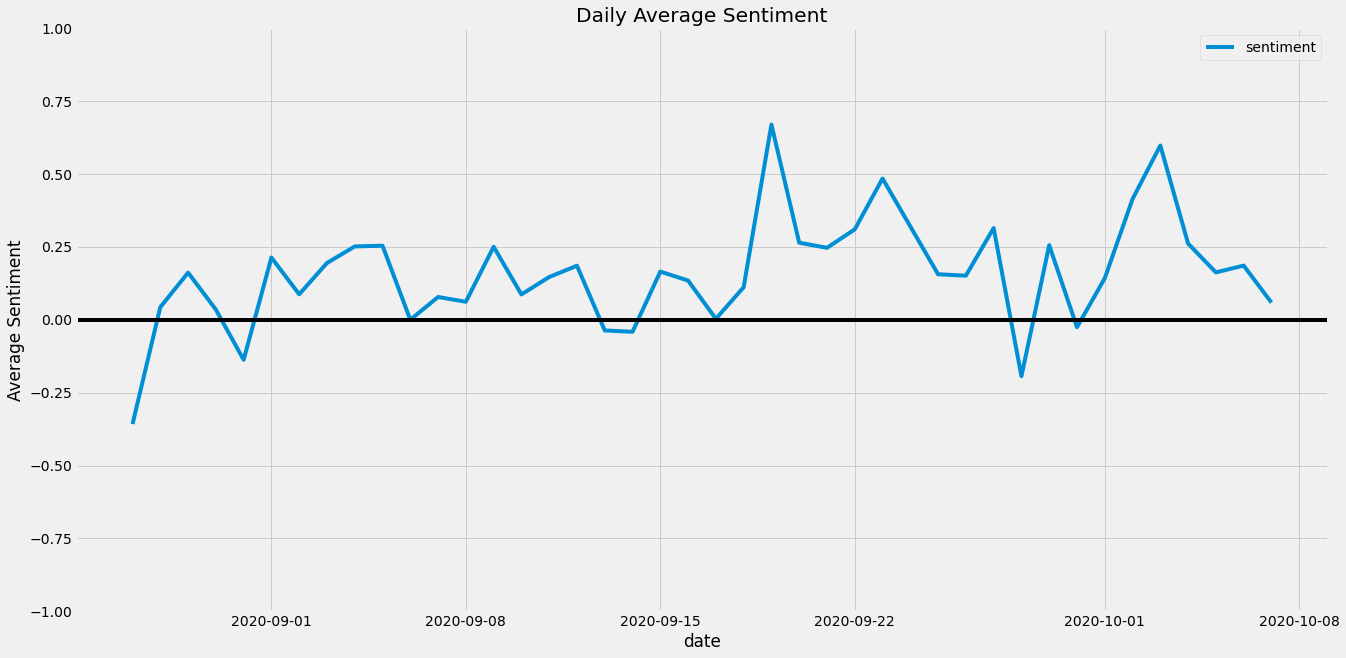

In [23]:
date_df.plot(kind= 'line', x ='date', y = 'sentiment', figsize = (20,10), ylim = (-1,1))
plt.axhline(y=0, color = 'black')
plt.ylabel('Average Sentiment')
plt.title('Daily Average Sentiment')

In [24]:
text = " ".join(text for text in df.tweet)

stopwords = set(STOPWORDS)
stopwords.update(["HTTPS","CO"])

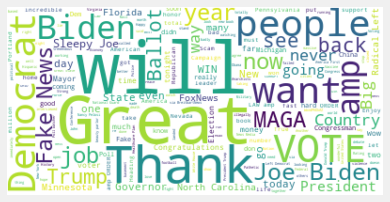

In [26]:
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear' )
plt.axis('off')
plt.show()

## Experiments with Dates, 4 year old tweets...so no....

__Work under progress__.....

In [51]:
date_df.head()

,date,tweet_length,id,likes,retweets,sentiment
0,2020-08-25,51.138889,1.298133e+18,61459.722222,15250.222222,0.062347
1,2020-08-26,37.243902,1.298460e+18,64008.951220,15161.121951,0.003190
2,2020-08-27,31.666667,1.298835e+18,55187.527778,13604.694444,-0.049706
3,2020-08-28,32.689655,1.299247e+18,67560.000000,14932.379310,0.042934
4,2020-08-29,88.419355,1.299647e+18,74196.967742,16473.000000,0.161400


In [52]:
date_df.tail()

,date,tweet_length,id,likes,retweets,sentiment
37,2020-10-01,84.523810,1.311640e+18,105339.238095,23369.714286,0.142124
38,2020-10-02,100.666667,1.311970e+18,989472.333333,199459.000000,0.413867
39,2020-10-03,73.000000,1.312413e+18,806826.500000,120449.250000,0.597375
40,2020-10-04,50.200000,1.312818e+18,360175.400000,66419.800000,0.261100
41,2020-10-05,70.517241,1.313122e+18,238229.241379,45404.206897,0.162303


From the above data we can confirm that Trump tweeted 1785 tweets in last 42 days i.e, from 2020-08-25 to 2020-10-05.

So we have to get approximately 15000 tweets for last 1 year data. We can also observe that we gor 1700 tweets in 10 pages, for 15K tweets we need 100 pages data

In [56]:
exp_tweets = [] #experiment tweets

for page in range(1,100):
    exp_tweets.extend(api.user_timeline(screen_name = "realDonaldTrump", count=200, page=page))
    
print("Number of tweets extracted: {}.".format(len(exp_tweets)))


Number of tweets extracted: 3230.


In [58]:
exp_tweets[3229].created_at

datetime.datetime(2020, 7, 4, 18, 26, 51)

Obtained tweets till july 4th!!, so basically got only last three months data, this data would be enough to analyze this election.

In [61]:
exp_tweets[3229].created_at

datetime.datetime(2020, 7, 4, 18, 26, 51)

But we can get data from others if anyone have done trump and clinton twitter analysis for previous election